<div style="font-family: Candara; text-align: left;"><font size="1" color="#00008B">
    <hr style="border: none;
               border-top: 2px solid black; 
               width: 35%; 
               margin-top: 5px;
               margin-bottom: 10px;
               margin-left: 0;">
    <div style="font-size: 20px; letter-spacing: 1.5px;"><h4 style="text-transform:">Holiday Reminder System with Python</div>
</div>
        
<span style="font-family:candara">**Published by** : Isaac Owusu-Appiah</span><br>
<span style="font-family:candara">**Date** : $20^{th}$ August, 2024</span>

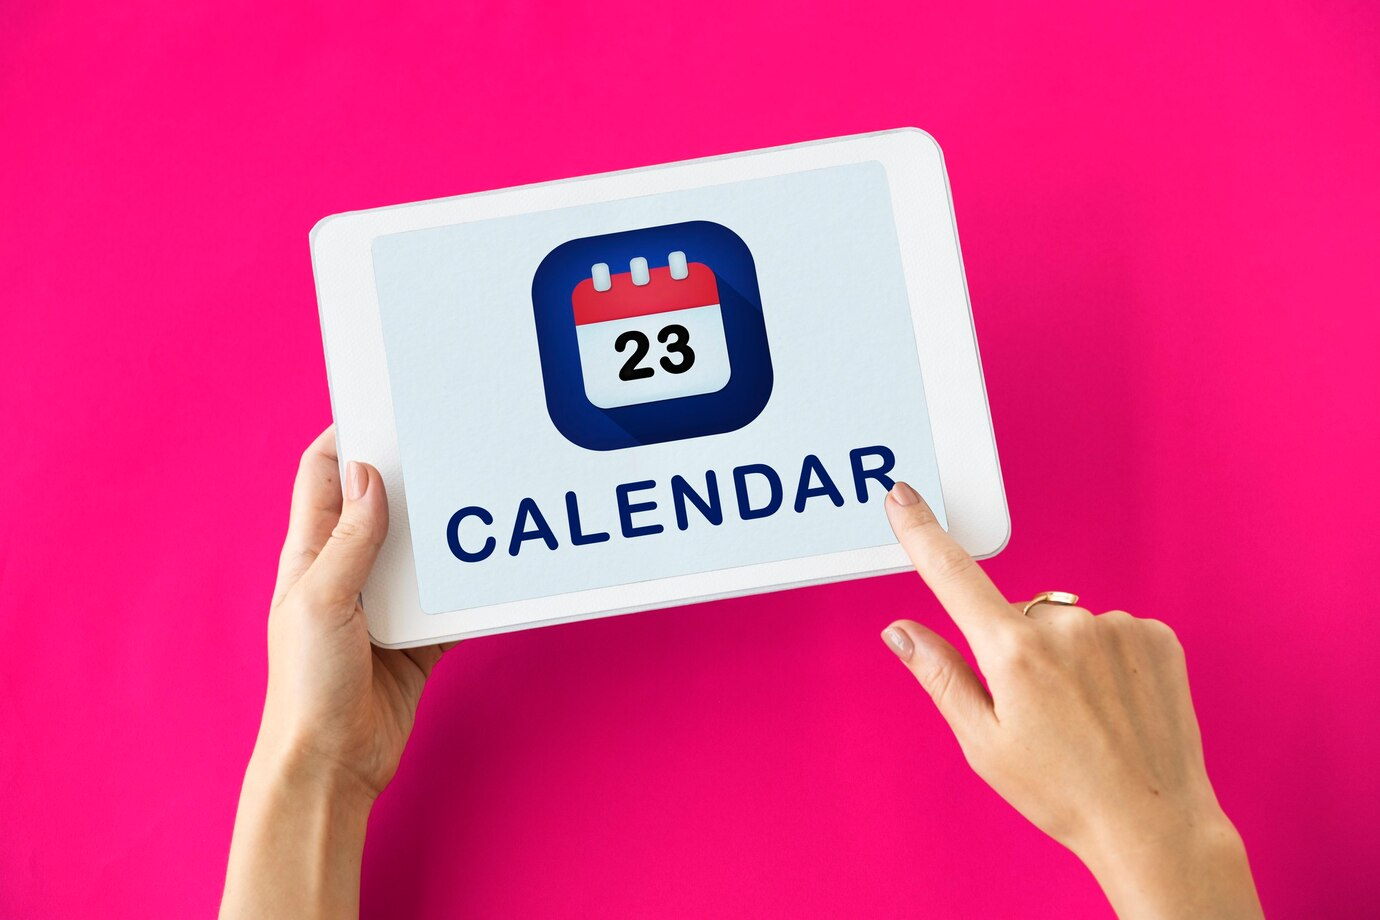

<span style="font-family:candara">**Holidays** are periods of celebration during which people are given time off from their regular activities to engage in practices that promote unity, such as national holidays and Independence Day. These occasions celebrate the values that bring us together **A Holiday Reminder** is a program that stores and manages holiday information, and notifying users of upcoming holiday celebrations. In this worksheet, we'll build a simple yet effective holiday reminder system using Python, leveraging its built-in libraries and  date-handling capabilities.</span><br>
* <span style="font-family:candara">**We will break down** the process of building the project into 6 six parts, each with explanations and example python codes.</span>
### <span style="font-family:candara">**1.)** Setting Up the Environment</span>

    A first step is to import the necessary library modules for the reminder system, and create virtual environment to manage dependencies

In [12]:
import json
import datetime
from collections import defaultdict

### <span style="font-family:candara">**2.)** Managing Holiday Data</span>

    Let's create functions to add, save and load holiday data

In [13]:
# Load holidays from a JSON file
def load_holidays(filename='holidays.json'):
    try:
        with open(filename, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        return {}

# Save holidays to a JSON file
def save_holidays(holidays, filename='holidays.json'):
    with open(filename, 'w') as file:
        json.dump(holidays, file)

# Add a holiday
def add_holiday(holidays, name, date):
    holidays[name] = date
    return holidays

#### <span style="font-family:candara">**These functions allow us to:**.</span>
* <span style="font-family:candara">Add new holidays to our dictionary.</span>
* <span style="font-family:candara">Save the holiday dictionary as a JSON file.</span>
* <span style="font-family:candara">Load holidays from a JSON file.</span>

In [14]:
holidays = {}
holidays = add_holiday(holidays, "New Year's Day", "2025-01-01")
holidays = add_holiday(holidays, "Independence Day", "2025-07-04")
holidays = add_holiday(holidays, "Christmas", "2025-12-25")
save_holidays(holidays)

print(holidays)

{"New Year's Day": '2025-01-01', 'Independence Day': '2025-07-04', 'Christmas': '2025-12-25'}


In [15]:
# load the birthday data
loaded_holidays = load_holidays()

print(loaded_holidays)

{"New Year's Day": '2025-01-01', 'Independence Day': '2025-07-04', 'Christmas': '2025-12-25'}


The output shows that we've successfully added birthdays, saved them to a file, and loaded them back into our program.

### <span style="font-family:candara">**3.)** Implementing the Reminder System</span>

    Let's create one core functionality of our reminder system

In [16]:
# Function to calculate days until a holiday
def days_until_holiday(holiday, current_date):
    next_holiday = datetime.datetime.strptime(holiday, "%Y-%m-%d").date().replace(year=current_date.year)
    if next_holiday < current_date:
        next_holiday = next_holiday.replace(year=current_date.year + 1)
    return (next_holiday - current_date).days

# Function to get upcoming holidays
def get_upcoming_holidays(holidays, current_date, days_ahead=30):
    upcoming = defaultdict(list)
    for holiday_name, holiday_date in holidays.items():
        days_until = days_until_holiday(holiday_date, current_date)
        if days_until <= days_ahead:
            upcoming[days_until].append((holiday_name, holiday_date))
    return upcoming

# Function to print holiday reminders
def print_holiday_reminders(upcoming):
    for days, holidays in sorted(upcoming.items()):
        if days == 0:
            print("Today's holidays:")
        elif days == 1:
            print("Tomorrow's holidays:")
        else:
            print(f"Holidays in {days} days:")
        for name, date in holidays:
            print(f"  - {name} ({date})")
        print()

# Example usage:
holidays = {
    "New Year's Day": "2025-01-01",
    "Independence Day": "2025-07-04",
    "Christmas": "2025-12-25",
    "Thanksgiving": "2025-11-28"
}

# Let's assume today is August 11, 2023
current_date = datetime.date(2023, 11, 10)

upcoming = get_upcoming_holidays(holidays, current_date)
print_holiday_reminders(upcoming)

Holidays in 18 days:
  - Thanksgiving (2025-11-28)



**Here's what each function does:**
- days_untill_holiday: Calculates the number of days until a specified holiday from the current date. It calculates the difference in days between next_holiday and current_date and returns the total days as well as the year of the next holiday.
- get_upcoming_holidays: It retrieves holidays that are coming up within a specified range (default is 30 days).
- print_reminders: Prints a reminder of upcoming holidays, organized by month. It prints out the holidays grouped by month, including how many days away each holiday is.

In the get_upcoming_holidays function, we use defaultdict(list). This allows us to append holidays to each day’s list without explicitly initializing empty lists, simplifying our code. It automatically creates a new empty list when we access a new key, saving us from having to check if a key exists and create a new list manually each time we want to add a holiday to a particular day.

**This output shows that Thankgiving’s holiday is coming up in 16 days from our example current date.**

### <span style="font-family:candara">**4.)** Putting It All Together</span>

    Finally, let's create a main function that bring everything together. This main function provides a simple command-line interface for our birthday reminder system, allowing users to:

In [8]:
def print_all_holidays(holidays):
    if not holidays:
        print("No holidays stored.")
    else:
        print("All stored holidays:")
        for name, date in sorted(holidays.items()):
            print(f"  - {name}: {date}")

def main():
    holidays = load_holidays()
    
    while True:
        print("\nHoliday Reminder System")
        print("1. Add a holiday")
        print("2. View upcoming holidays")
        print("3. View all holidays")
        print("4. Exit")
        
        choice = input("Enter your choice (1-4): ")
        
        if choice == '1':
            name = input("Enter holiday name: ")
            date = input("Enter holiday date (YYYY-MM-DD): ")
            holidays = add_holiday(holidays, name, date)
            save_holidays(holidays)
            print(f"Holiday added: {name} on {date}")
        elif choice == '2':
            current_date = datetime.date.today()  # Use today's date
            upcoming = get_upcoming_holidays(holidays, current_date)
            if upcoming:
                print_holiday_reminders(upcoming)
            else:
                print("No upcoming holidays in the next 30 days.")
        elif choice == '3':
            print_all_holidays(holidays)
        elif choice == '4':
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()


Holiday Reminder System
1. Add a holiday
2. View upcoming holidays
3. View all holidays
4. Exit


Enter your choice (1-4):  1
Enter holiday name:  New Year's Day
Enter holiday date (YYYY-MM-DD):  2025-01-01


Holiday added: New Year's Day on 2025-01-01

Holiday Reminder System
1. Add a holiday
2. View upcoming holidays
3. View all holidays
4. Exit


Enter your choice (1-4):  3


All stored holidays:
  - Christmas: 2025-12-25
  - Independence Day: 2025-07-04
  - New Year's Day: 2025-01-01

Holiday Reminder System
1. Add a holiday
2. View upcoming holidays
3. View all holidays
4. Exit


Enter your choice (1-4):  4


Goodbye!


The **print_all_holidays** function displays all stored holidayss by name, providing users with a complete overview of the data in the system. Finally, this interface allows users to easily manage their holidays or upcoming important dates, view upcoming celebrations, and get an overview of all stored important date or holidays.

**In conclusion**, we’ve created a functional holiday reminder system using Python’s datetime module for date manipulation, json for data storage and collections.defaultdict for organizing upcoming holidays. This system demonstrates key concepts in working with dates and storage in Python.

Thanks for reading. Happy coding